In [84]:
import scanpy as sc
import singleCellHaystack as hs

# Load data

In [85]:
adata = sc.datasets.paul15()
adata

/Users/diez/miniconda3/envs/singleCellHaystack/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/diez/miniconda3/envs/singleCellHaystack/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'

# Preprocess

/Users/diez/miniconda3/envs/singleCellHaystack/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


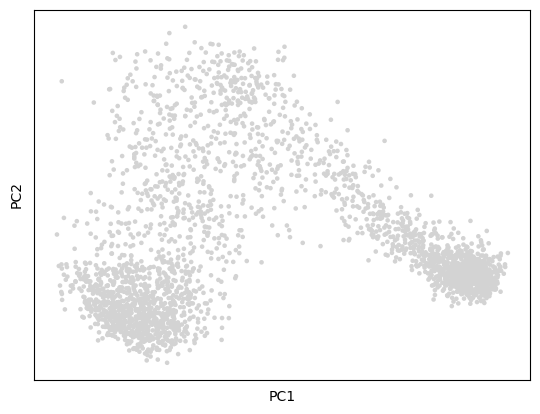

In [86]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pl.pca(adata)

/Users/diez/miniconda3/envs/singleCellHaystack/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


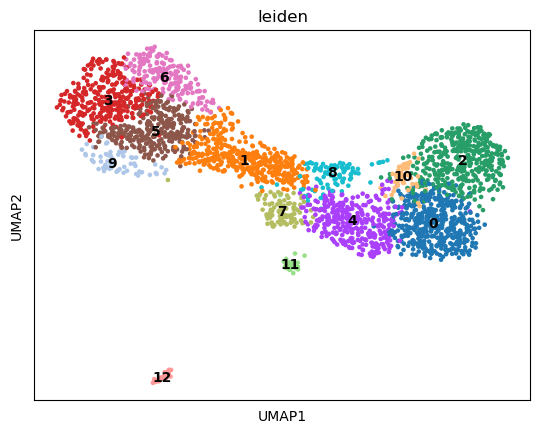

In [87]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="leiden", legend_loc="on data")

# Calculate DPT trajectories

In [88]:
sc.tl.diffmap(adata)
sc.tl.dpt(adata)
sc.pl.umap(adata, color="dpt_pseudotime")

# Run singleCellHaystack

 For now there is not direct way to access the pseudotime information from AnnData object. But we can pass the expression matrix and 1D coordinates directly.

In [89]:
import numpy
pseudotime = numpy.array(adata.obs.dpt_pseudotime.to_list())
pseudotime = pseudotime.reshape(-1, 1)
pseudotime

array([[0.027526699 ],
       [0.1844632626],
       [0.2824547589],
       ...,
       [0.024467092 ],
       [0.1840169877],
       [0.2610832453]])

In [90]:
res = hs.haystack(adata.X, coord=pseudotime, features=adata.var_names)

> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 3451 features ...


100%|██████████| 3451/3451 [00:01<00:00, 1831.91it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████| 100/100 [00:04<00:00, 20.61it/s]


> calculating P values ...
> done.


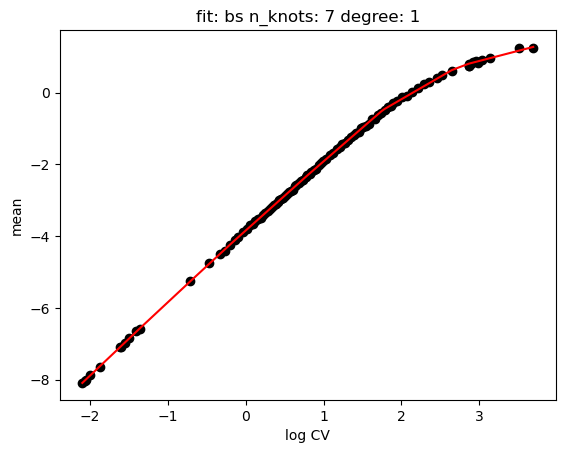

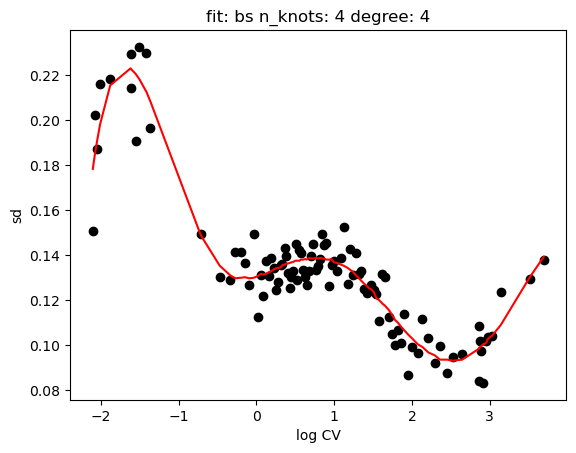

In [91]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

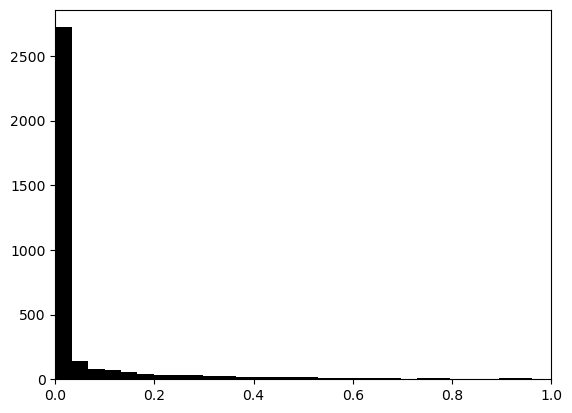

In [92]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

In [93]:
sum = res["results"]
sum

gene       KLD          pval      pval_adj    logpval  logpval_adj
2425     Prtn3  0.177701  2.225502e-89  7.680208e-86 -88.652572   -85.114627
1121   Fam132a  0.351011  4.442031e-86  1.532945e-82 -85.352418   -81.814473
553       Car2  0.156820  1.025334e-83  3.538429e-80 -82.989134   -79.451190
815       Ctsg  0.217872  4.388964e-83  1.514631e-79 -82.357638   -78.819693
1954       Mt2  0.480812  1.839566e-80  6.348343e-77 -79.735285   -76.197340
...        ...       ...           ...           ...        ...          ...
3409    Zfp217  0.192728  9.547449e-01  1.000000e+00  -0.020113     0.000000
1069       Epx  1.444927  9.588547e-01  1.000000e+00  -0.018247     0.000000
2198    Parp14  0.150764  9.706013e-01  1.000000e+00  -0.012959     0.000000
154   AK202301  0.026495  9.771774e-01  1.000000e+00  -0.010027     0.000000
3308     Vamp2  0.237500  9.950423e-01  1.000000e+00  -0.002158     0.000000

[3451 rows x 6 columns]

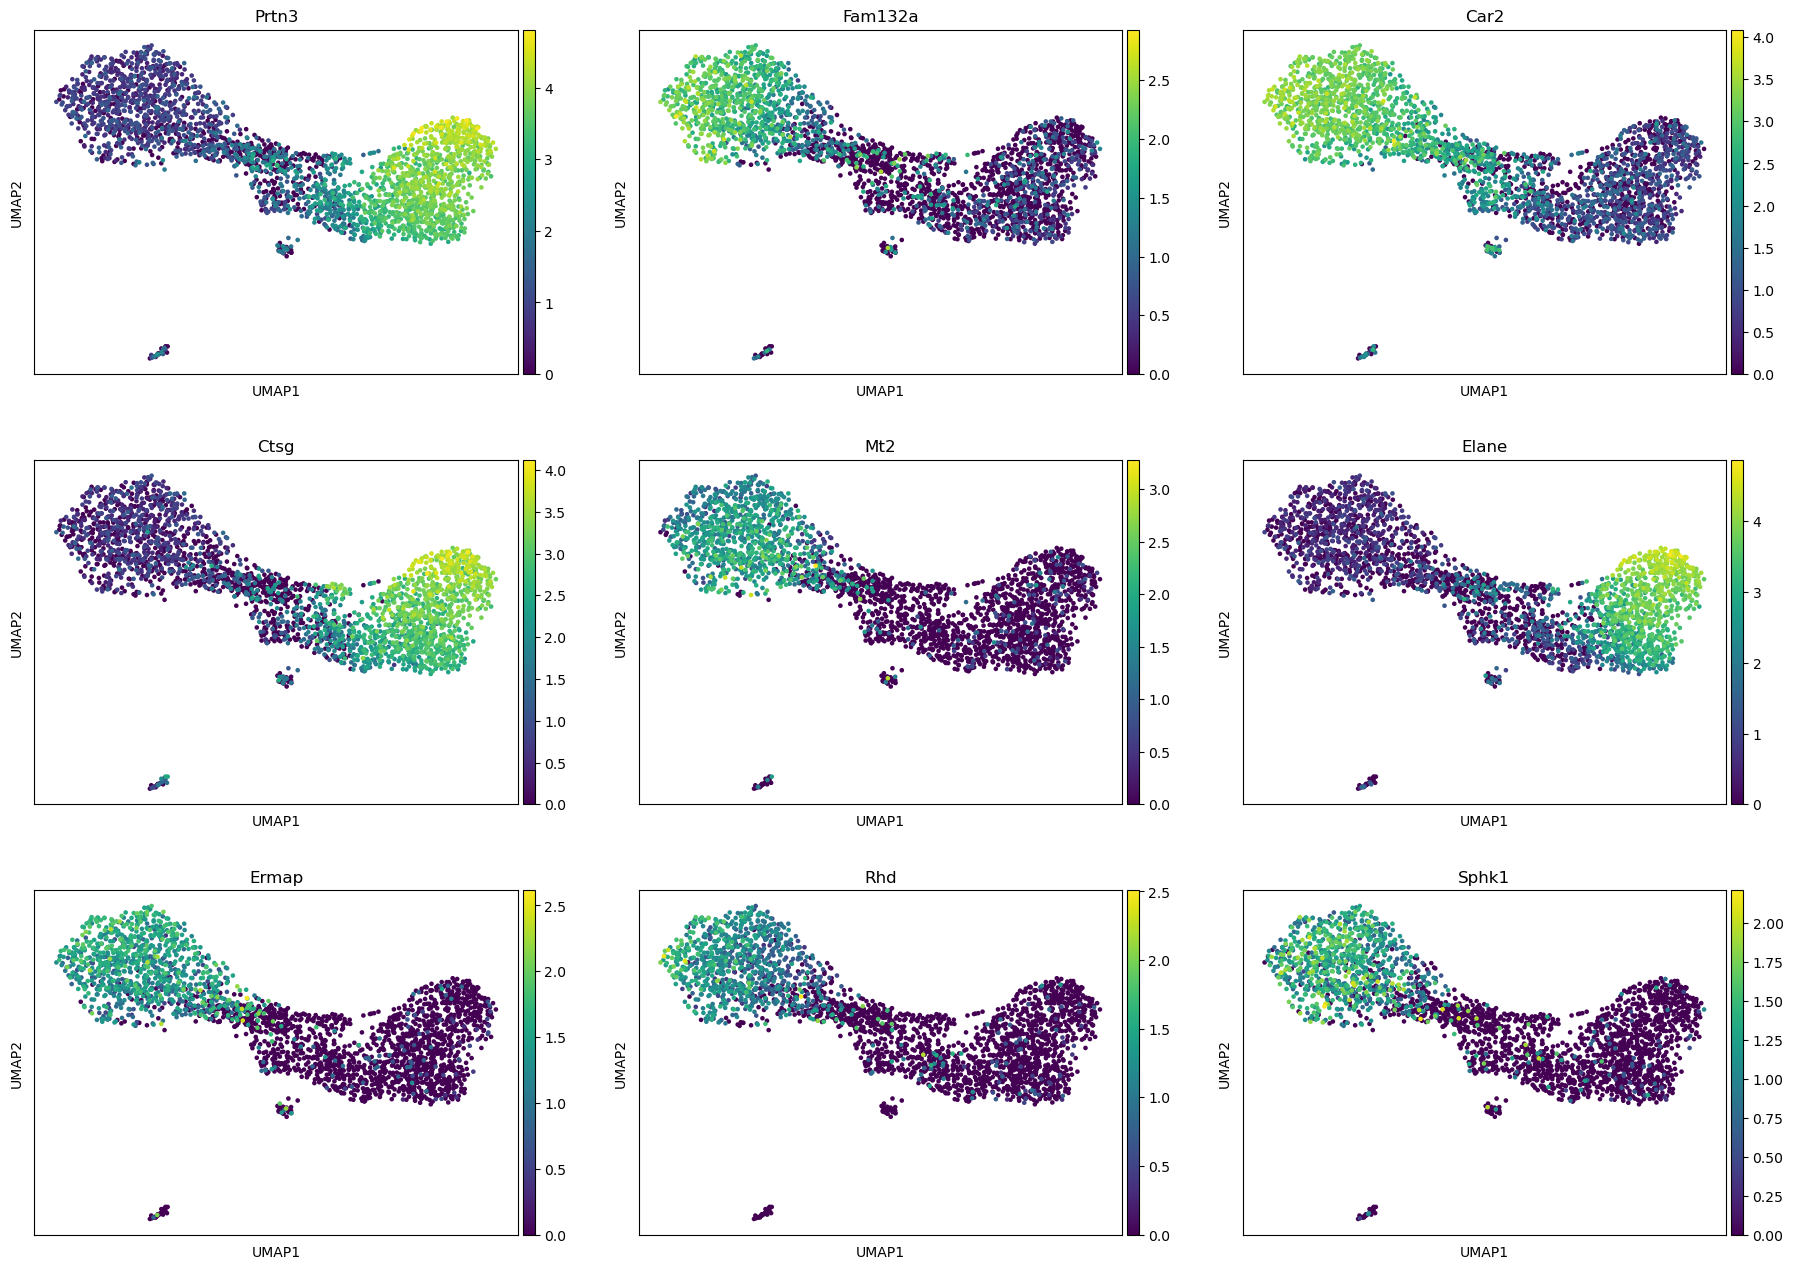

In [94]:
sc.pl.umap(adata, color=sum.gene.iloc[:9], ncols=3)

# Export results

In [95]:
#sum.to_csv("results-trajectory.csv")